In [63]:
import math
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

data1 = pd.read_csv('seeds_dataset.txt', header=None, sep="\t", error_bad_lines=False)
print(data1)

         0      1       2      3      4      5      6  7
0    15.26  14.84  0.8710  5.763  3.312  2.221  5.220  1
1    14.88  14.57  0.8811  5.554  3.333  1.018  4.956  1
2    14.29  14.09  0.9050  5.291  3.337  2.699  4.825  1
3    13.84  13.94  0.8955  5.324  3.379  2.259  4.805  1
4    16.14  14.99  0.9034  5.658  3.562  1.355  5.175  1
..     ...    ...     ...    ...    ...    ...    ... ..
194  12.19  13.20  0.8783  5.137  2.981  3.631  4.870  3
195  11.23  12.88  0.8511  5.140  2.795  4.325  5.003  3
196  13.20  13.66  0.8883  5.236  3.232  8.315  5.056  3
197  11.84  13.21  0.8521  5.175  2.836  3.598  5.044  3
198  12.30  13.34  0.8684  5.243  2.974  5.637  5.063  3

[199 rows x 8 columns]


/tmp/ipykernel_252/598644699.py:7: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  data1 = pd.read_csv('seeds_dataset.txt', header=None, sep="\t", error_bad_lines=False)
b'Skipping line 8: expected 8 fields, saw 10\nSkipping line 36: expected 8 fields, saw 10\nSkipping line 61: expected 8 fields, saw 9\nSkipping line 69: expected 8 fields, saw 9\nSkipping line 107: expected 8 fields, saw 9\nSkipping line 136: expected 8 fields, saw 9\nSkipping line 170: expected 8 fields, saw 9\nSkipping line 171: expected 8 fields, saw 9\nSkipping line 173: expected 8 fields, saw 9\nSkipping line 202: expected 8 fields, saw 9\nSkipping line 204: expected 8 fields, saw 9\n'


In [66]:
def pca(data, n_components):
    data_avg = data.values
    avg = np.mean(data_avg, axis=0)
    data_avg = data_avg - avg
    data_avg1 = data_avg.transpose()
    Cov_Matrix = np.dot(data_avg1, data_avg) * (1/(data.shape[0]-1))
    eigenvalues, eigenvectors = np.linalg.eig(Cov_Matrix)
    Vectors = []
    for i in range(n_components):
        max_idx = np.argmax(eigenvalues)
        Vectors.append(eigenvectors[max_idx])
        eigenvalues[max_idx] = -np.inf
    final_data = np.dot(Vectors, data.transpose())
    D = final_data.transpose()
    return D
reduced_data = pca(data1, n_components=2)
print(reduced_data)

[[10.58954497  8.64204038]
 [10.46022157  7.84842563]
 [ 9.78265852  8.52647547]
 [ 9.45027001  8.15517966]
 [11.46492319  8.60671236]
 [ 9.89445273  8.40621627]
 [ 9.98694735  9.09853654]
 [11.82043368  9.04428586]
 [11.64089283  9.00080712]
 [10.28180678  9.85283422]
 [ 9.71841144  7.80183673]
 [ 9.19140969  9.09514676]
 [ 9.25068268  8.5284774 ]
 [ 9.24011011  8.39096067]
 [ 9.76647683  9.49360376]
 [ 9.19350402  9.81302534]
 [11.07074374  8.54305921]
 [10.23305456  8.24956989]
 [ 8.32957845  8.51763383]
 [ 9.58720205  8.58541189]
 [ 9.66691736  8.31853116]
 [11.33408537  8.16018881]
 [ 8.28595079  6.66670681]
 [10.3866444   8.34421135]
 [11.56072793  8.3130187 ]
 [ 8.61104622  8.29201057]
 [ 8.53027159  7.65209283]
 [ 9.60322926  8.44881087]
 [ 8.9667023   8.52131066]
 [ 9.16625247  6.86670936]
 [10.59311005  9.41832437]
 [ 9.40170015  9.04857122]
 [ 9.54088736  8.01596066]
 [10.48901795  8.46836292]
 [11.31752927  9.33946134]
 [12.01533478  9.88709581]
 [10.14538175  8.90017775]
 

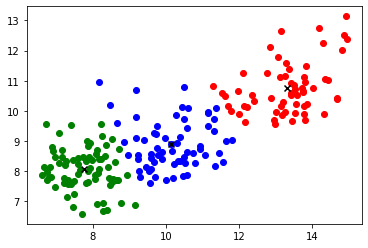

In [92]:
import random
import matplotlib.pyplot as plt

centroids = [D[random.randint(0, 199)] for _ in range(3)]

iters = 100

k = 3

def euclidean_distance(p1, p2):
    x1, y1 = p1
    x2, y2 = p2
    return ((x1 - x2) ** 2 + (y1 - y2) ** 2) ** 0.5

for i in range(iters):
    clusters = [[] for _ in range(k)]
    for point in D:
        distances = [euclidean_distance(point, c) for c in centroids]
        nearest_centroid_index = distances.index(min(distances))
        clusters[nearest_centroid_index].append(point)
    for j in range(k):
        if clusters[j]:
            centroids[j] = (sum([p[0] for p in clusters[j]]) / len(clusters[j]),
                            sum([p[1] for p in clusters[j]]) / len(clusters[j]))

labels = [0] * len(D)
for i, c in enumerate(clusters):
    for point in c:
        index = D.index(point)
        labels[index] = i

colors = ['b', 'r', 'g']
for i in range(k):
    plt.scatter([p[0] for p in D if labels[D.index(p)] == i],
                [p[1] for p in D if labels[D.index(p)] == i],
                c=colors[i])
    plt.scatter(centroids[i][0], centroids[i][1], c='k', marker='x')
plt.show()


# Evaluation Matrics

In [99]:
def Sc(D, labels):
    Sil_Coe=[]
    n = len(D)
    for i in range(n):
        a_sum=0
        b_sum=0
        count_a=-1
        count_b=0
        label = labels[i]
        for iter1 in range(n):
            if label == labels[iter1]:
                a_sum = a_sum + euclidean_distance(D[i], D[iter1])
                count_a = count_a + 1
            else:
                b_sum = b_sum + euclidean_distance(D[i], D[iter1])
                count_b = count_b + 1
        a=(a_sum/count_a)
        b=(b_sum/count_b)
        Sil_Coe.append((b - a)/max(a,b))
    sc = sum(Sil_Coe)/len(Sil_Coe)
    print('The silhouette coefficient of the clustering is',sc)
Sc(D,labels)

The silhouette coefficient of the clustering is 0.6596832558643395


In [111]:
def Rindex():
    n = len(D)
    label_actual = data1[7]
    tp = 0
    tn = 0
    for i in range(n):
        for j in range(i+1, n):
             if label_actual[i] == label_actual[j] and labels[i] == labels[j]:
                tp = tp+1
    for i in range(n):
        for j in range(i+1, n):
             if label_actual[i] != label_actual[j] and labels[i] != labels[j]:
                tn = tn +1
    rd = (tp+tn) / ((n*(n-1)/2))
    print('The rand index of the clustering is',rd)
Rindex()

The rand index of the clustering is 0.8436627582356225
